In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlgrad.regular import Rosenbrok
from mlgrad.loss import ErrorLoss
from mlgrad.func import Square
from mlgrad.risk import SimpleFunctional
from mlgrad.gd import FG
from mlgrad.averager import ArrayAdaM2

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
ff = Rosenbrok()

In [4]:
extent = [-3.0,3.0,-3.0,3.0]
param_init = np.array([-1.9,2.])

def generate_dataset():
    X1 = np.linspace(-3.0, 3.0, 100)
    X2 = np.linspace(-3.0, 3.0, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    xx = np.c_[XX1.ravel(), XX2.ravel()]
    Y = [ff(x) for x in xx]
    Y = np.array(Y)
    return Y, xx, Y.reshape(XX1.shape), XX1, XX2

In [5]:
Y, X, YY, XX1, XX2 = generate_dataset()

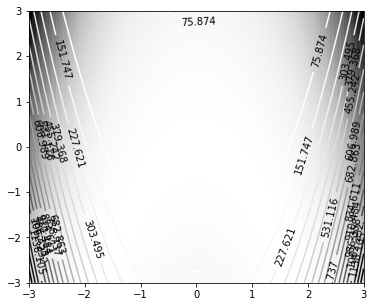

In [6]:
plt.figure(figsize=(6,5))
cb = plt.imshow(YY, extent=extent, aspect='auto', cmap=plt.cm.Greys)
levels = np.linspace(Y.min(), Y.max(), 20)
ct=plt.contour(YY, extent=extent, levels=levels, cmap=plt.cm.Greys)
plt.clabel(ct, colors='k')
plt.show()

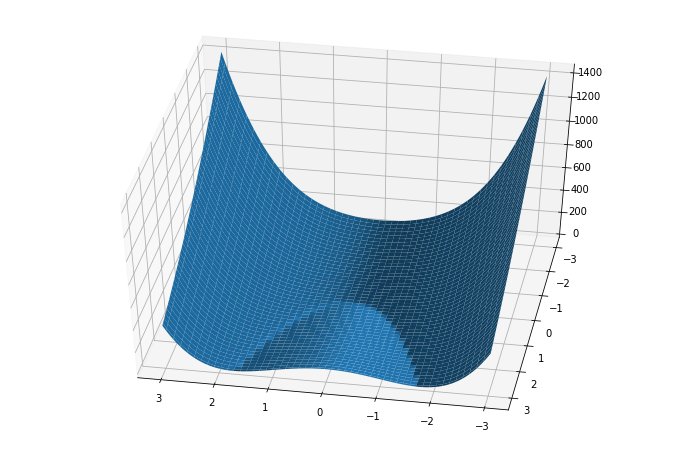

In [7]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

ax.view_init(45, 100)
ax.plot_surface(XX1, XX2, YY, )
plt.show()

In [41]:
er1 = SimpleFunctional(ff, param_init.copy())

d1={'param':[er1.param.copy()], 'val':[ff(er1.param)]}
def log_param1(alg, d=d1):
    d1['param'].append(alg.risk.param.copy())
    d1['val'].append(ff(alg.risk.param))

fg1 = FG(er1, h=0.01, n_iter=20000, tol=1.0e-8, callback=log_param1)
fg1.fit()
print('iterations:', fg1.K, er1.param.base)

iterations: 9593 [0.98892313 0.97792433]


In [15]:
er2 = SimpleFunctional(ff, param_init.copy())

d2={'param':[er2.param.copy()], 'val':[ff(er2.param)]}
def log_param2(alg, d=d2):
    d2['param'].append(alg.risk.param.copy())
    d2['val'].append(ff(alg.risk.param))

fg2 = FG(er2, h=0.15, n_iter=20000, tol=1.0e-8, callback=log_param2)
avger2 = ArrayAdaM2()
fg2.use_gradient_averager(avger2)
fg2.fit()
print('iterations:', fg2.K, er2.param.base)

iterations: 2626 [0.9958412  0.99168741]


In [42]:
params1 = np.array(d1['param'])
vals1 = np.array(d1['val'])
params2 = np.array(d2['param'])
vals2 = np.array(d2['val'])

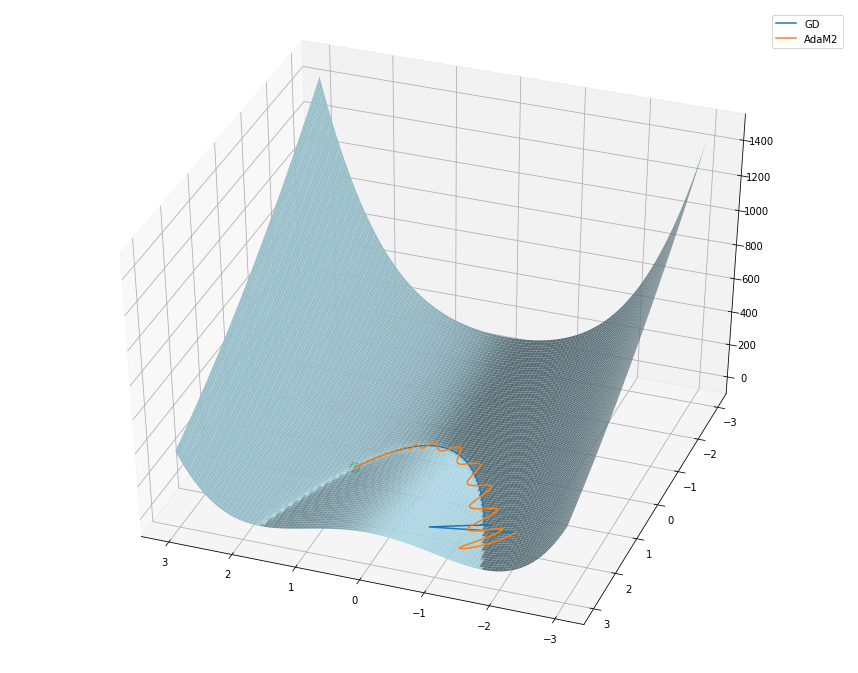

In [43]:
fig = plt.figure(figsize=(15,12))
ax = fig.gca(projection='3d')
ax.view_init(40, 110)
ax.plot_surface(XX1, XX2, YY, color='LightBlue', rcount=100, ccount=100, )
ax.plot3D(params1[:,0], params1[:,1], vals1, label='GD')
ax.plot3D(params2[:,0], params2[:,1], vals2, label='AdaM2')
ax.scatter3D([1., 1.], [1., 1.], [0., 0.], s=100, c='g')
ax.grid(1)
ax.legend()
plt.show()